## EDA , FE , Logistic Regression on Algerian Forest Fire Prediction Dataset

## EDA and Feature Engineering

1. Data Profiling
2. Data Cleaning
3. Statistical Analysis
4. Graphical Analysis
5. Data Scaling

### Logistic Regression Implementation

1.Logistic Regression on Original Dataset

2.Performance metrics for above model

3.Creating an imbalanced dataset from original dataset

4.Balancing the imbalanced Dataset

5.Logistic Regression on above dataset

6.Performance Metrics for above Dataset

7.Compairing the performance of Original balanced dataset and the balanced dataset that we create from an imbalanced one

## What is Logistic Regression?

Ans : Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.
    
### Advantages of Logisitic Regression
1.It is very simple and easy to implement.

2.The output is more informative than other classification algorithms

3.It expresses the relationship between independent and dependent variables

4.Very effective with linearly seperable data

### Disadvantages of Logisitic Regression
1.Not effective with data which are not linearly seperable

2.Not as powerful as other classification models

3.Multiclass classifications are much easier to do with other algorithms than logisitic regression

4.It can only predict categorical outcomes 

## Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading The Dataset 

In [3]:
df = pd.read_csv('D://Algerian_forest_fires_dataset.csv')
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [4]:
#SHAPE OF THE DATASET
df.shape

(247, 14)

In [5]:
df.iloc[122:125,:]

day  month  year  Temperature   RH   Ws  Rain   \
122                            NaN    NaN   NaN          NaN  NaN  NaN    NaN   
123  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
124                            day  month  year  Temperature   RH   Ws  Rain    

     FFMC  DMC   DC  ISI  BUI  FWI  Classes    
122   NaN  NaN  NaN  NaN  NaN  NaN        NaN  
123   NaN  NaN  NaN  NaN  NaN  NaN        NaN  
124  FFMC  DMC   DC  ISI  BUI  FWI  Classes

In [6]:
# Dropping the unwanted rows and column 
df.drop([122,123,124],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [7]:
# Shape of the data sfter dropping the column 
df.shape

(244, 14)

In [8]:
df.tail(124)

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
120  29     9  2012          26  80  16   1.8  47.4  2.9   7.7  0.3     3   
121  30     9  2012          25  78  14   1.4    45  1.9   7.5  0.2   2.4   
122   1     6  2012          32  71  12   0.7  57.1  2.5   8.2  0.6   2.8   
123   2     6  2012          30  73  13     4  55.7  2.7   7.8  0.6   2.9   
124   3     6  2012          29  80  14     2  48.7  2.2   7.6  0.3   2.6   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
120  0.1   not fire     
121  0.1   not fire     
122  0.2   not fire     
123  0.2   not fire     
124  0.1   not fire     
..   ...           ...  
239  6.5       fire     
240    0   not fire     
241  0.2   not fire     
242  0.7   not fire     
243  0.5  not fire      

[124 rows x 14 columns]

In [9]:
#Creating a column region  
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [10]:
## Columns of the Dataset 
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [11]:
## Stripping the names of the columns as it has unwanted spaces 
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [12]:
## Stripping the data of below features as it has unwanted spaces 
for feature in ['Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes']:
    df[feature]=df[feature].str.replace(" ","")    

In [13]:
## Checking the unique data points of FWI feature 
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

In [14]:
### Here we got 'fire' data point in FWI column , so to remove this it is replaced by mode  
df[df['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [15]:
df['FWI'].mode()

0    0.4
dtype: object

In [16]:
df.loc[165,'FWI']='0.4'

In [17]:
## Information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


### Here all the features are in categorical datatypes. 

## Checking the null value in the features 

In [19]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

#### 1 null value is present in Classes feature 

## Replacing the null value of class feature 

In [20]:
df[df['Classes']=='nan'].index

Int64Index([], dtype='int64')

In [21]:
df.loc[165,'Classes']='fire'

In [22]:
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [23]:
df['Classes']=df['Classes'].str.replace('notfire','0')
df['Classes']=df['Classes'].str.replace('fire','1')

### Replacing the values of region feature with 0 and 1 

In [24]:
df['region'].unique()

array(['bejaia', 'Sidi-Bel Abbes'], dtype=object)

In [25]:
df['region']=df['region'].str.replace('bejaia','0')
df['region']=df['region'].str.replace('Sidi-Bel Abbes','1')

## Converting the datatype from categorical to numerical

In [26]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['DC']=df['DC'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['Classes']=df['Classes'].astype(int)
df['region']=df['region'].astype(int)

## Checking the information of dataset after changing the datatypes of features 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  region       244 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.1 KB


#### So, all the features are converted from categorical  to numerical datatypes

## Creating a Copy of dataframe from Original Dataframe

In [28]:
data=df.copy()
data.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

## Feature Information

*Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

*Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

*RH : Relative Humidity in %: 21 to 90

*Ws :Wind speed in km/h: 6 to 29

*Rain: total day in mm: 0 to 16.8 FWI Components

*Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

*Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

*Drought Code (DC) index from the FWI system: 7 to 220.4

*Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

*Buildup Index (BUI) index from the FWI system: 1.1 to 68

*Fire Weather Index (FWI) Index: 0 to 31.1

## Statistical Analysis 

In [29]:
data.describe()

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288484    4.774180   16.664754   
std      1.999406   14.337571   12.368039   47.619393    4.175318   14.204824   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.250000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI     Classes      region  
count  244.000000  244.000000  244.000000  
mean     7.008197    0.565574    0.500000  
std      7.437383    0.496700    0.501028  
min      0.000000    0.000000    0.000000  
25%      0.700000    0.000000    0.000000  
50%      4.200000    1.000000    0.500000  
75%     11.375000    1.000000    1.000000  
max     31.100000    1.000000    1.000000

### Observation

No missing values is present in the dataset

In [30]:
data.cov()

day         month  year  Temperature          RH  \
day          7.788167e+01  4.641920e-16   0.0     3.071308   -9.747689   
month        4.641920e-16  1.238683e+00   0.0    -0.238683   -0.627572   
year         0.000000e+00  0.000000e+00   0.0     0.000000    0.000000   
Temperature  3.071308e+00 -2.386831e-01   0.0    13.204817  -35.396782   
RH          -9.747689e+00 -6.275720e-01   0.0   -35.396782  221.539415   
Ws           1.165621e+00 -1.296296e-01   0.0    -2.840215    9.874739   
Rain        -1.980908e+00  7.860082e-02   0.0    -2.374270    6.635431   
FFMC         2.834676e+01  2.485597e-01   0.0    35.297598 -137.785533   
DMC          5.365433e+01  9.384774e-01   0.0    21.712423  -74.580245   
DC           2.218594e+02  6.766276e+00   0.0    64.113719 -156.174991   
ISI          6.548769e+00  2.866255e-01   0.0     9.218043  -42.920524   
BUI          6.483903e+01  1.356790e+00   0.0    23.512265  -73.700941   
FWI          2.303207e+01  6.962963e-01   0.0    15.102287  -63.152169   
Classes      8.845038e-01  1.234568e-02   0.0     0.935168   -3.216117   
region      -1.535123e-16  0.000000e+00   0.0     0.497942   -3.030864   

                    Ws       Rain        FFMC         DMC           DC  \
day           1.165621  -1.980908   28.346758   53.654328   221.859379   
month        -0.129630   0.078601    0.248560    0.938477     6.766276   
year          0.000000   0.000000    0.000000    0.000000     0.000000   
Temperature  -2.840215  -2.374270   35.297598   21.712423    64.113719   
RH            9.874739   6.635431 -137.785533  -74.580245  -156.174991   
Ws            7.897102   0.956129   -6.577727   -0.043306    10.204060   
Rain          0.956129   3.997623  -15.595918   -7.135415   -28.259196   
FFMC         -6.577727 -15.595918  205.565939  106.820535   344.048788   
DMC          -0.043306  -7.135415  106.820535  152.968382   515.551947   
DC           10.204060 -28.259196  344.048788  515.551947  2267.606583   
ISI           0.178913  -2.897687   44.283138   34.831449    99.199508   
BUI           1.187799  -8.496825  120.090018  172.536341   637.129111   
FWI           0.606139  -4.800293   73.187426   80.480590   262.143165   
Classes      -0.092862  -0.376833    5.484349    3.588791    11.994976   
region       -0.248971  -0.041152    1.613992    1.184156    -1.944053   

                   ISI         BUI         FWI    Classes        region  
day           6.548769   64.839034   23.032065   0.884504 -1.535123e-16  
month         0.286626    1.356790    0.696296   0.012346  0.000000e+00  
year          0.000000    0.000000    0.000000   0.000000  0.000000e+00  
Temperature   9.218043   23.512265   15.102287   0.935168  4.979424e-01  
RH          -42.920524  -73.700941  -63.152169  -3.216117 -3.030864e+00  
Ws            0.178913    1.187799    0.606139  -0.092862 -2.489712e-01  
Rain         -2.897687   -8.496825   -4.800293  -0.376833 -4.115226e-02  
FFMC         44.283138  120.090018   73.187426   5.484349  1.613992e+00  
DMC          34.831449  172.536341   80.480590   3.588791  1.184156e+00  
DC           99.199508  637.129111  262.143165  11.994976 -1.944053e+00  
ISI          17.433281   37.714477   28.198196   1.525363  5.615226e-01  
BUI          37.714477  201.777024   90.628767   4.119605  6.218107e-01  
FWI          28.198196   90.628767   55.314665   2.636497  7.181070e-01  
Classes       1.525363    4.119605    2.636497   0.246711  4.115226e-02  
region        0.561523    0.621811    0.718107   0.041152  2.510288e-01

## Checking the distribution of the features 

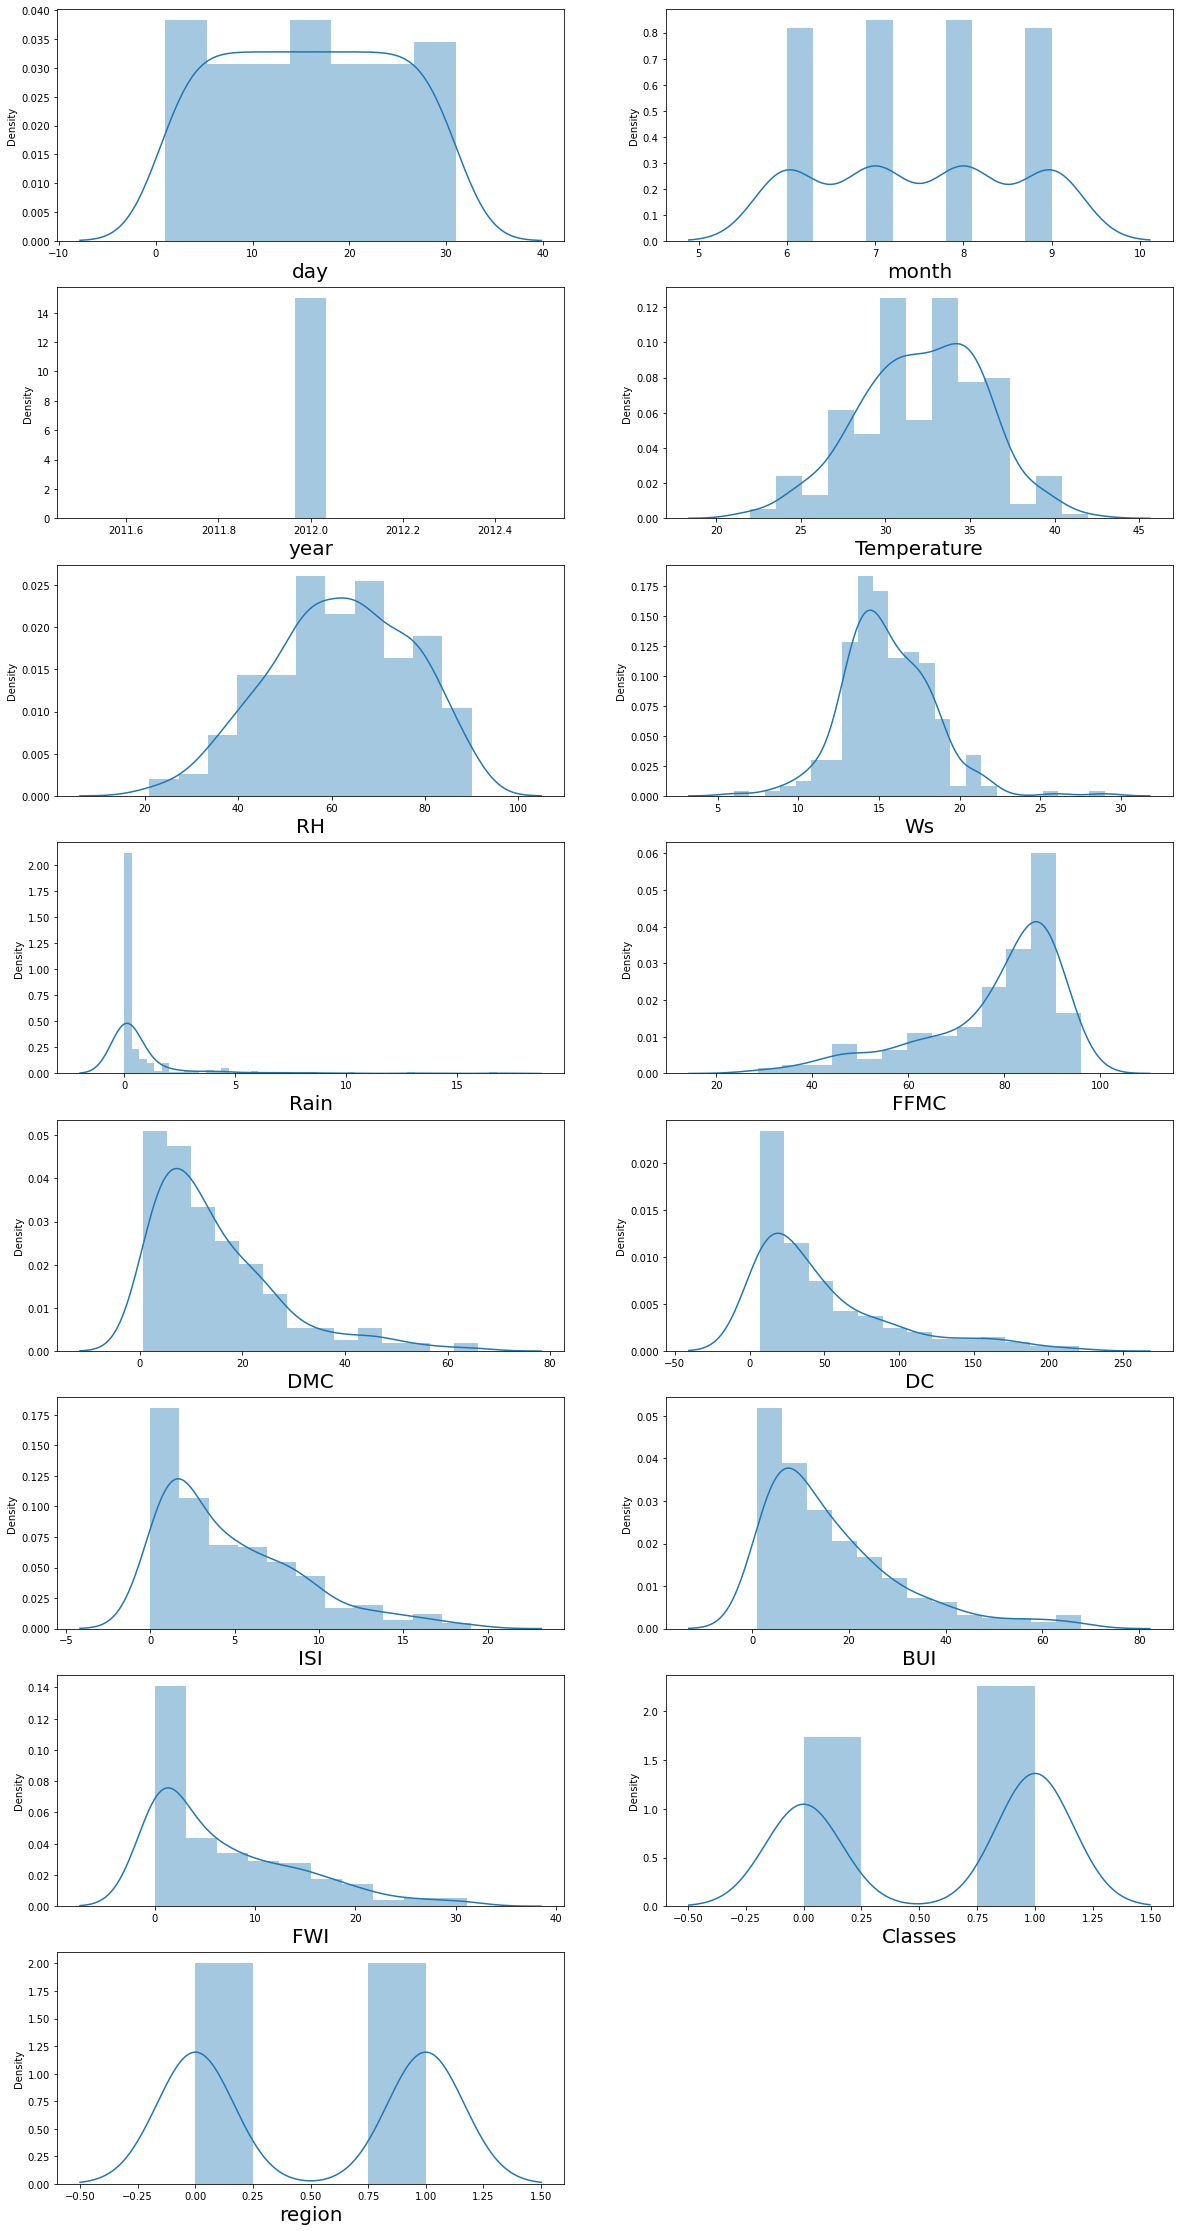

In [31]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Observations
Rain, DMC, DC, FWI,ISI,BUI are rightly skewed(log normal distribution)

There is no variance in the year attribute

## Multivariate Analysis 

<Figure size 1080x1080 with 0 Axes>

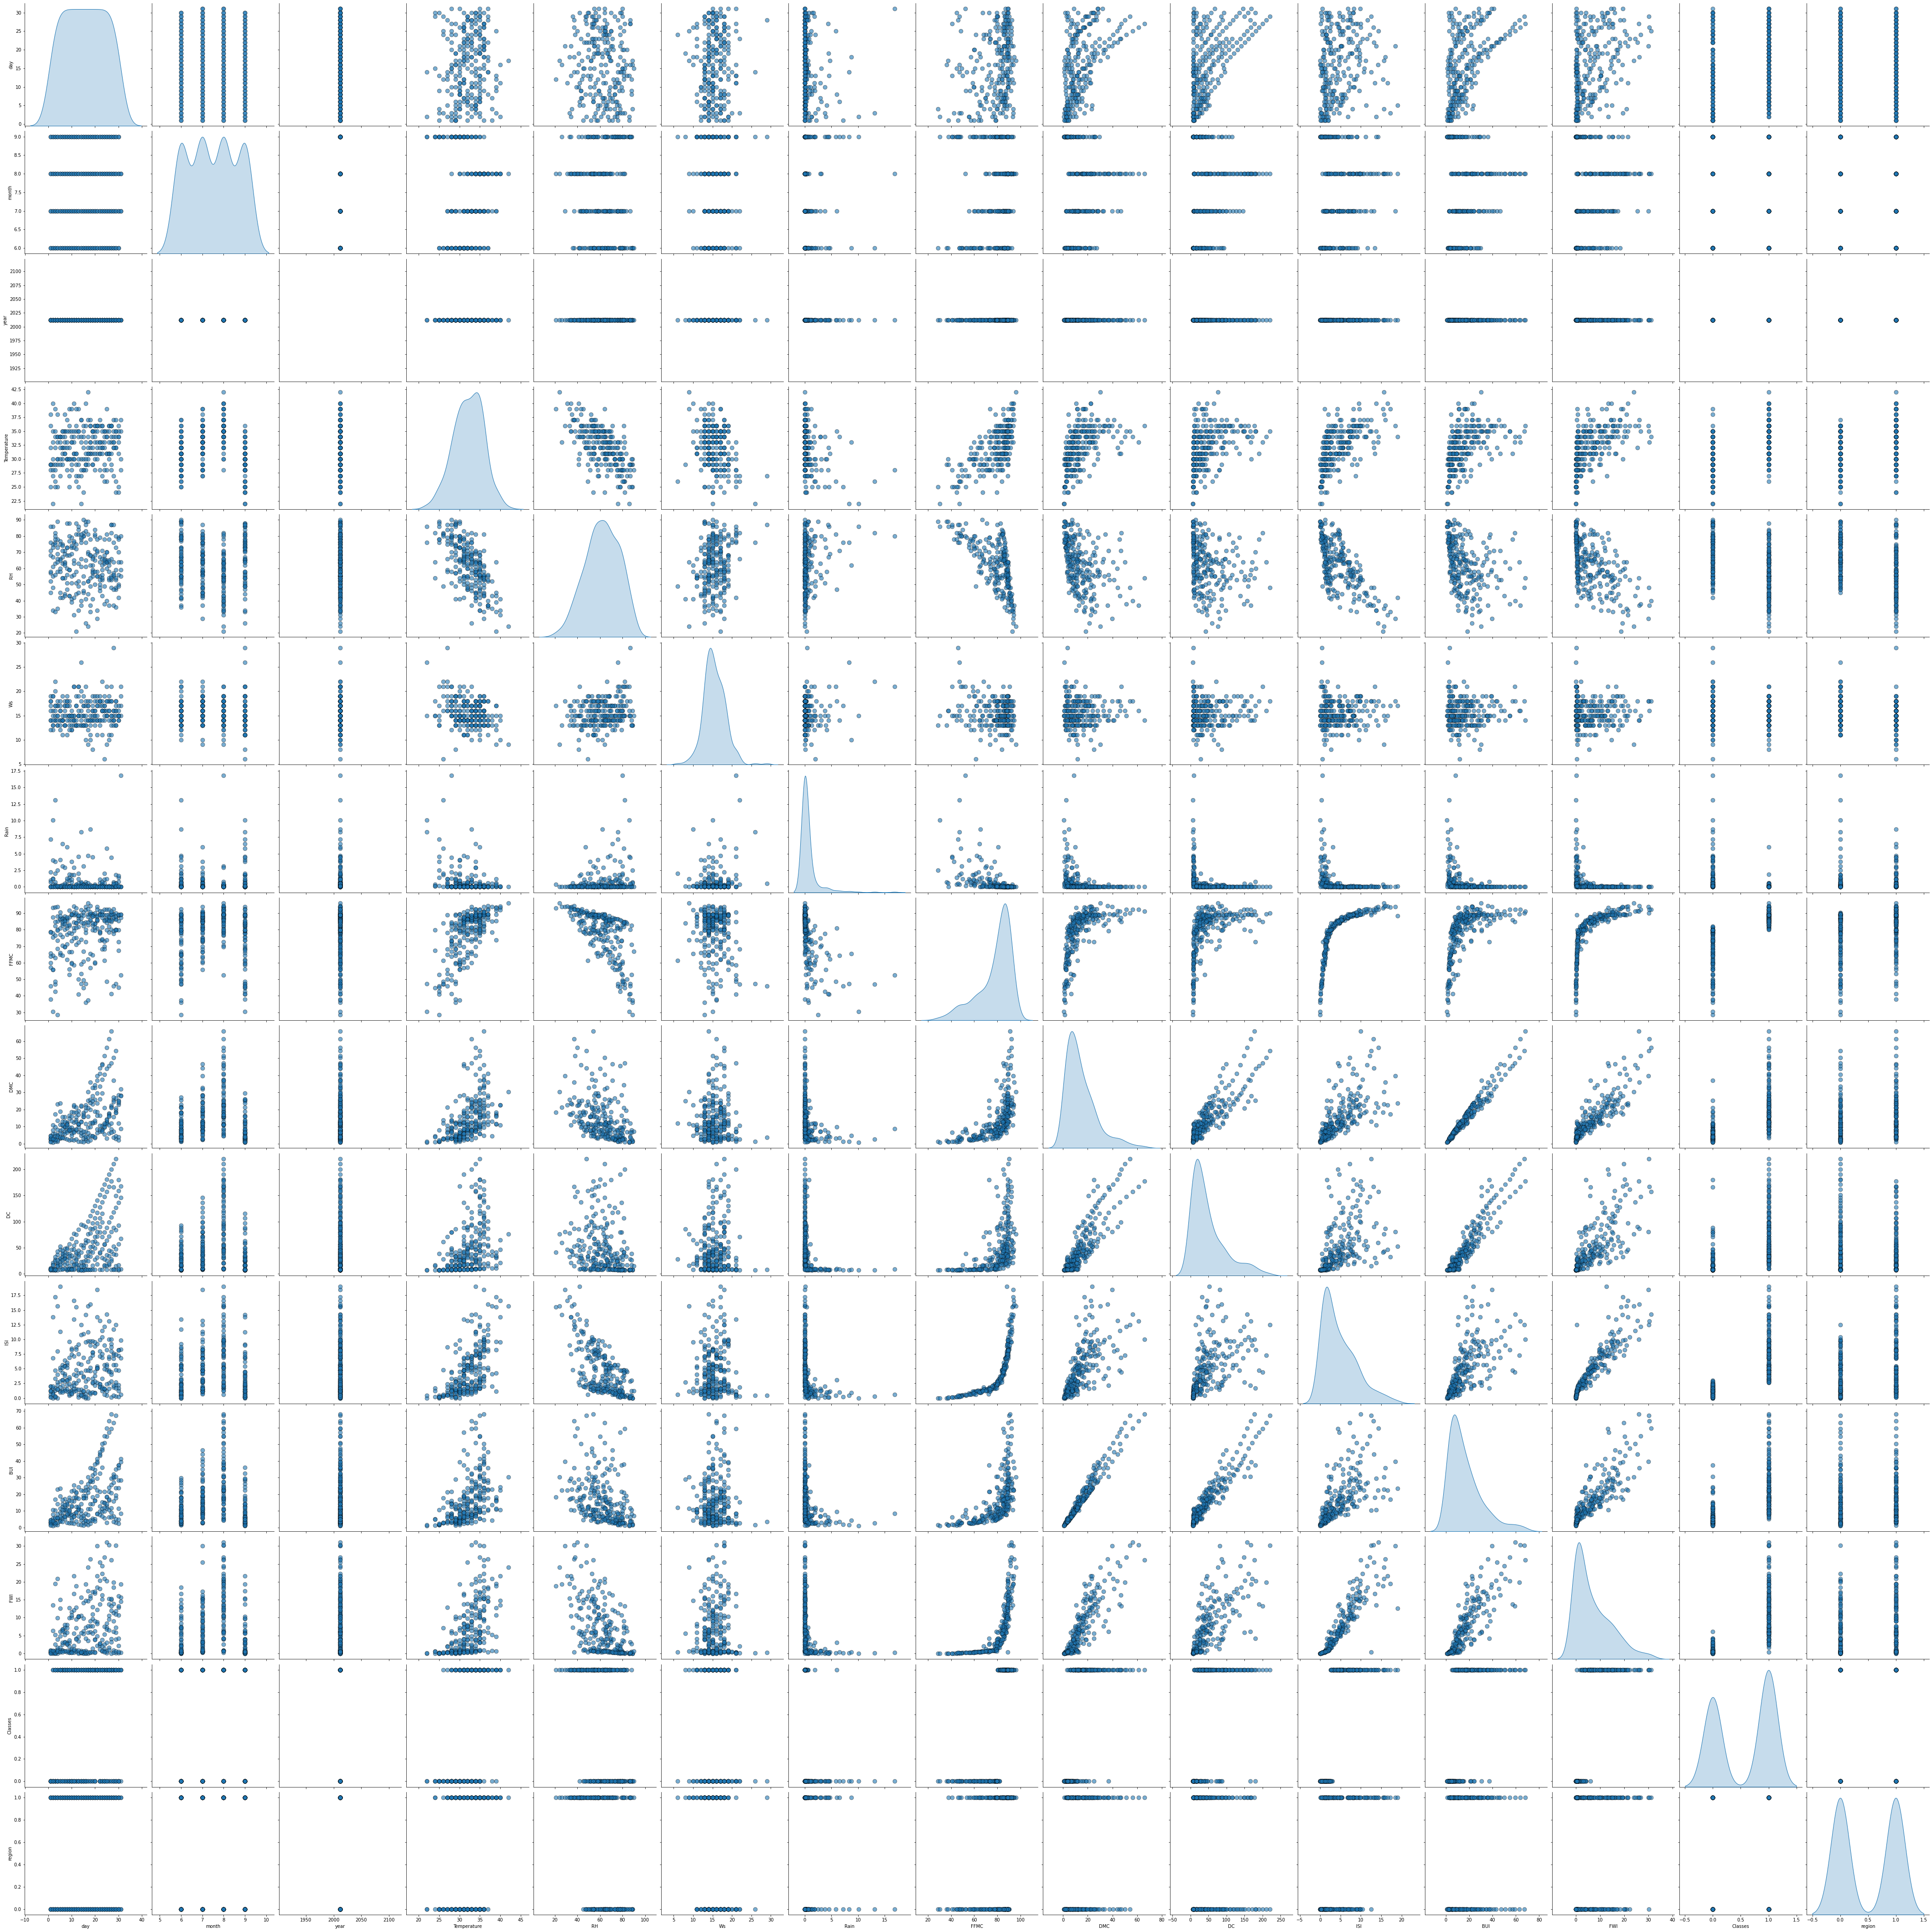

In [32]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(data,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

<AxesSubplot:>

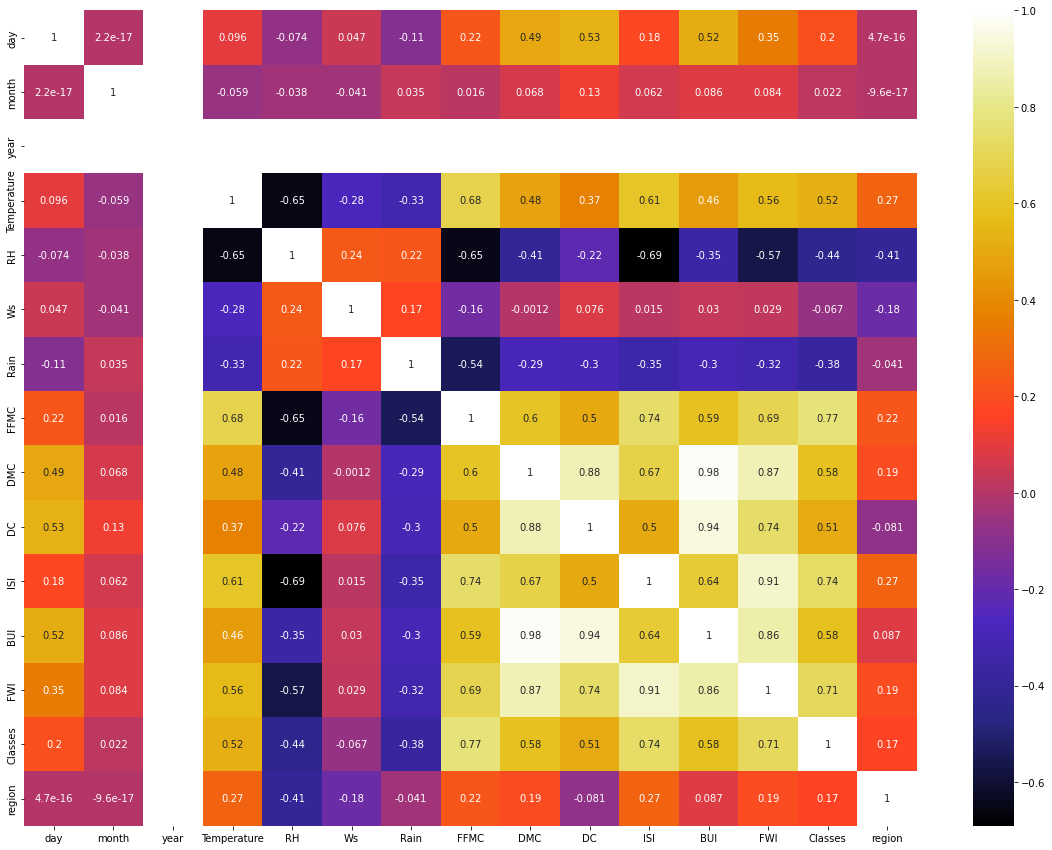

In [33]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),cmap="CMRmap", annot=True)

## Visualisation of Target Feature 

In [34]:
data.Classes.value_counts()

1    138
0    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='region', ylabel='Classes'>

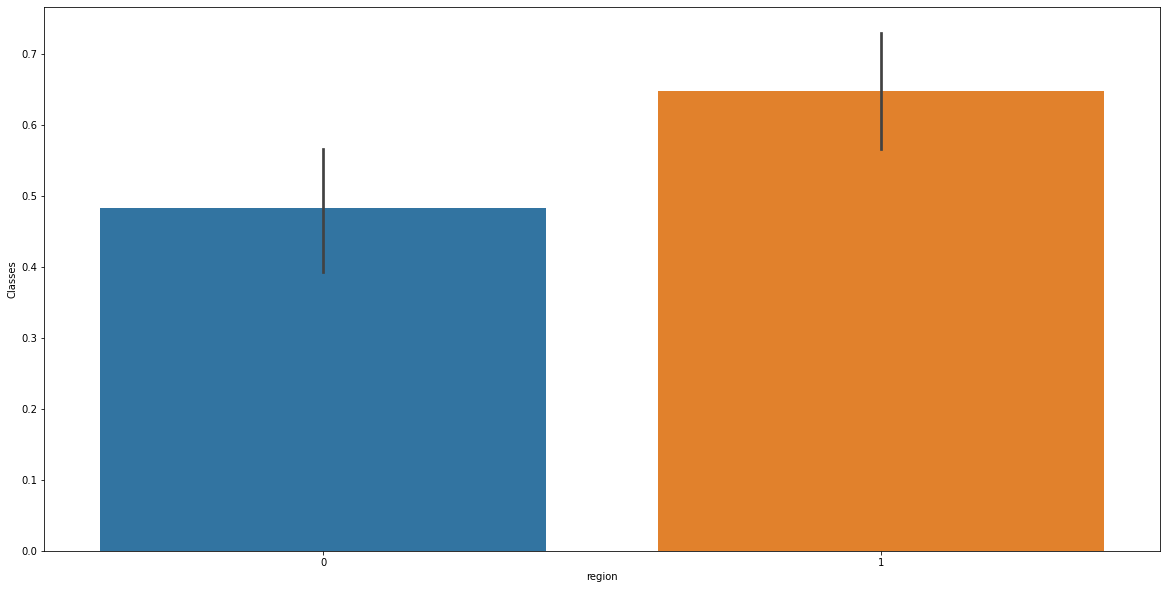

In [35]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Classes",data=data)

## Observation

Sidi=Bel Abbes region has most of the fire happen

## Visualisation of Temperature Feature 

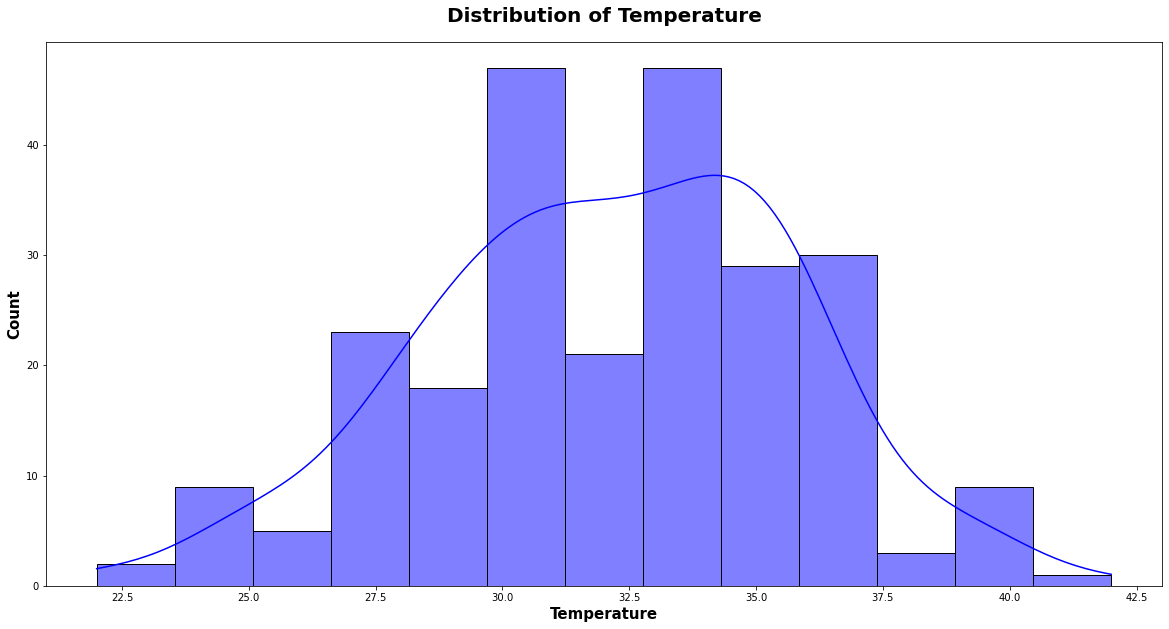

In [36]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=data.Temperature,color='b',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

##  Observation

Temperature occur most of the time in range 32.5 to 35.0  

## Highest Temperature attained 

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

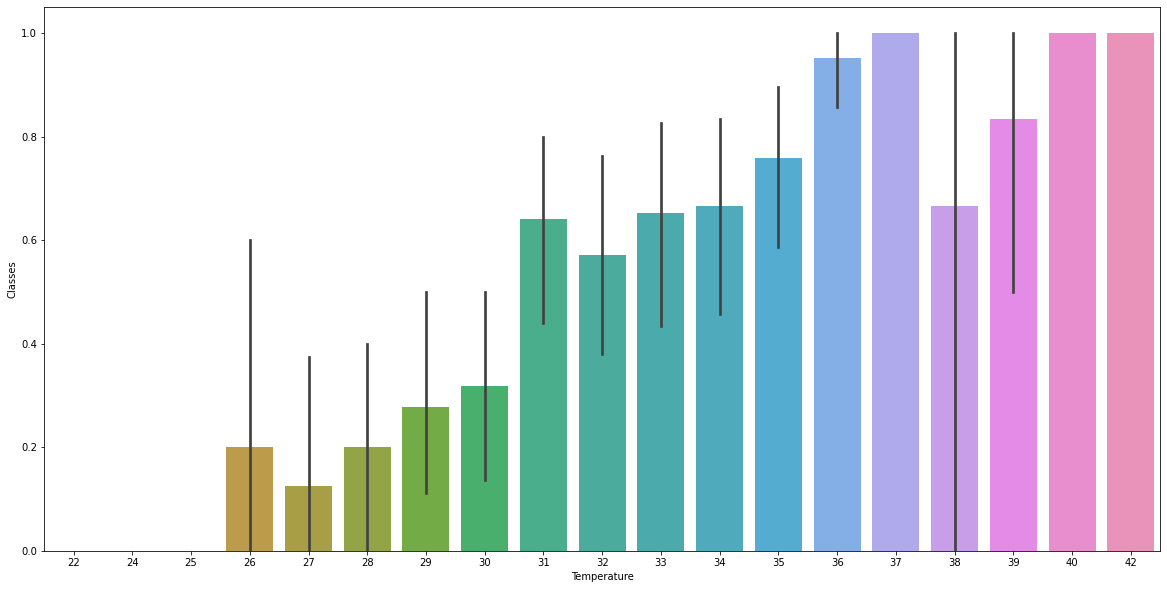

In [37]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Classes",data=data)

##  Observation
Highest temperature is 42,40,37

## Which region is mostly effected by rain 

<AxesSubplot:xlabel='region', ylabel='Rain'>

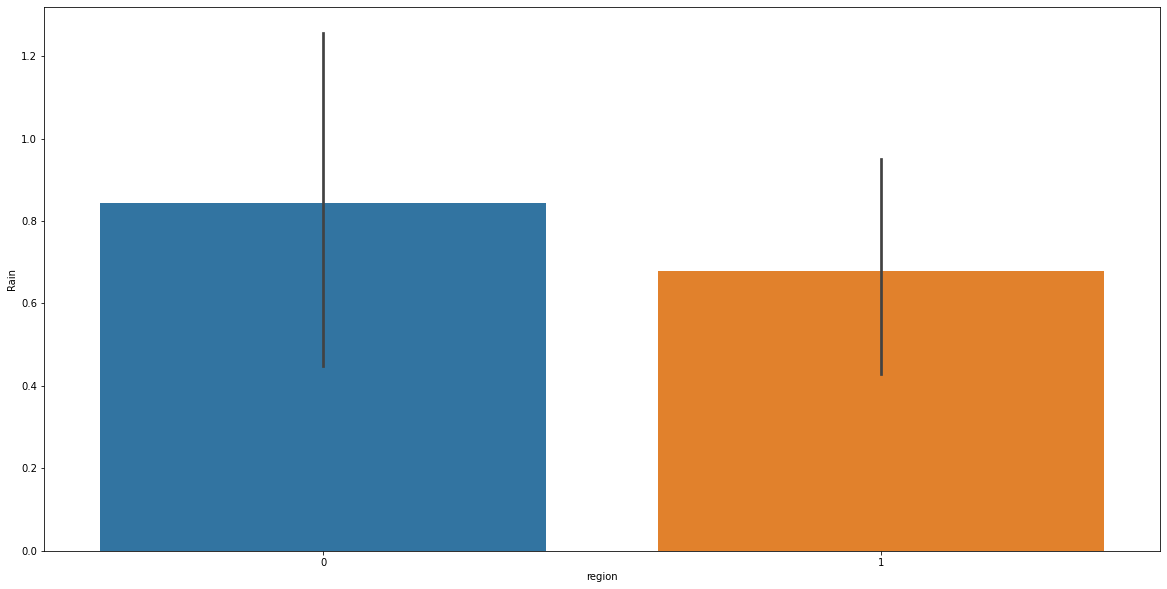

In [38]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Rain",data=data)

## Observation
Bejaia is the region in which most of the time rain happens

## Which region is highly effected by Temperature 

<AxesSubplot:xlabel='region', ylabel='Temperature'>

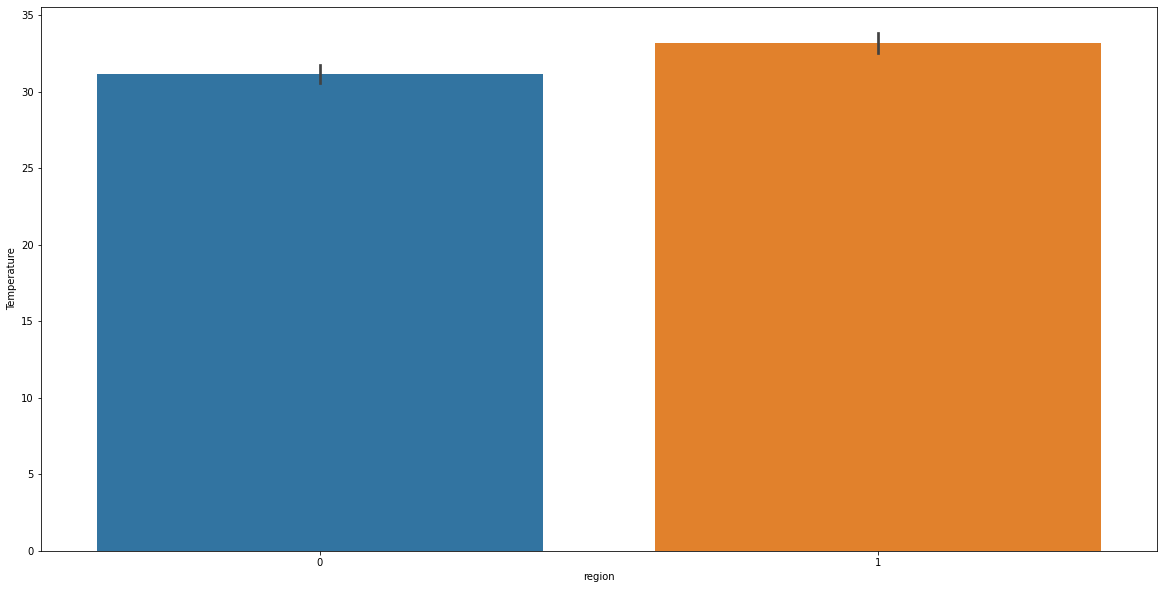

In [39]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Temperature",data=data)

## Observation
Sidi=Bel Abbes region mostly effected by Temperature

## Reg plot

In [40]:
num_col=[feature for feature in data.columns if data[feature].dtype != 'O']
num_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'region']

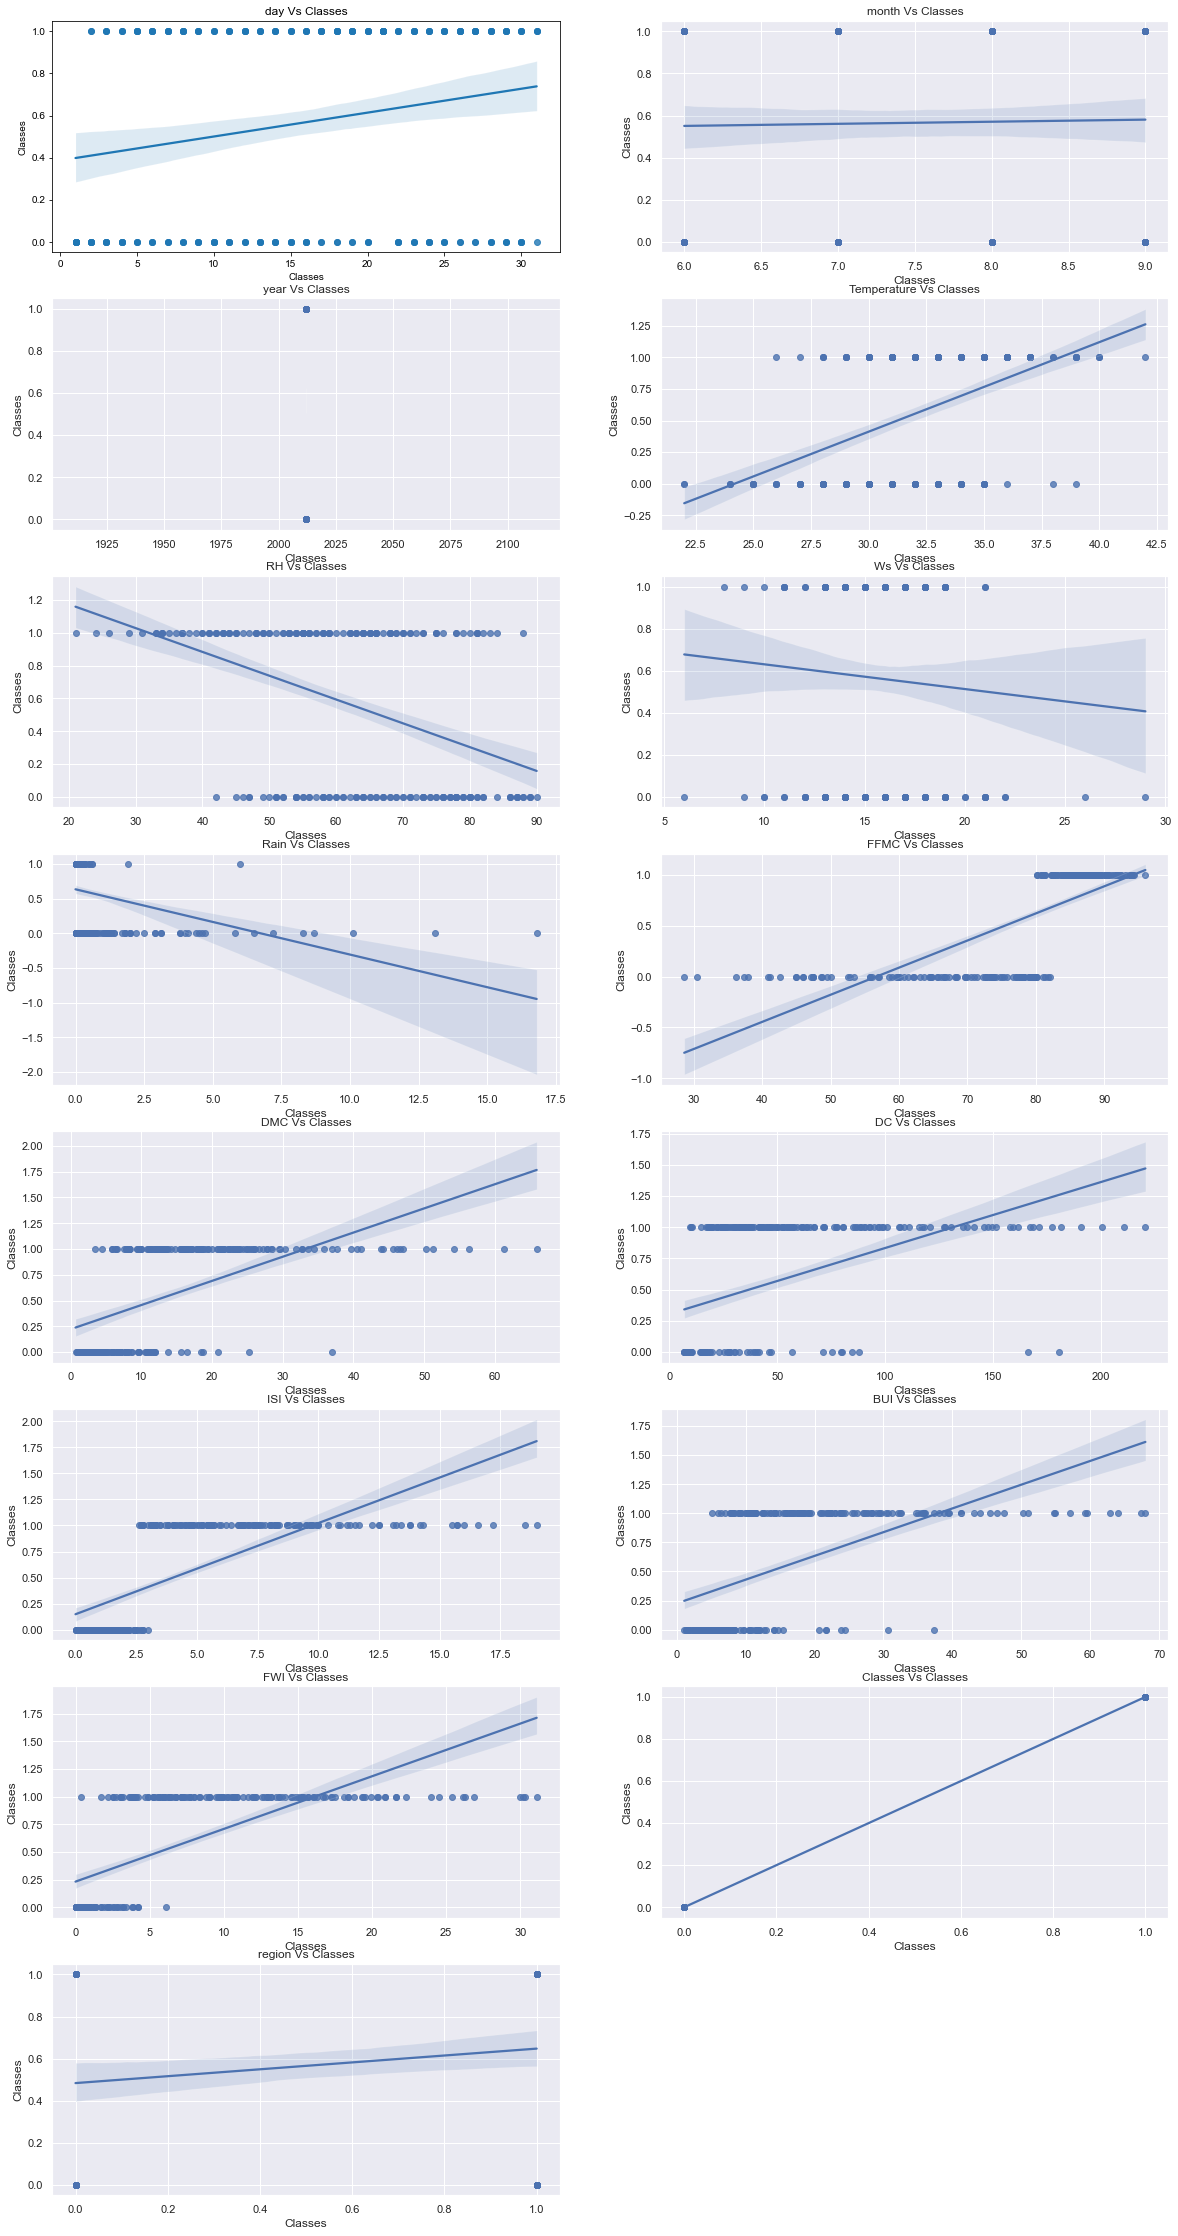

In [41]:
plt.figure(figsize=(20,40))
for i in enumerate(num_col):
    plt.subplot(8,2,i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=data,x=i[1],y='Classes')
    plt.xlabel('Classes')
    plt.title('{} Vs Classes'.format(i[1]))

## Boxplot to find outliers 


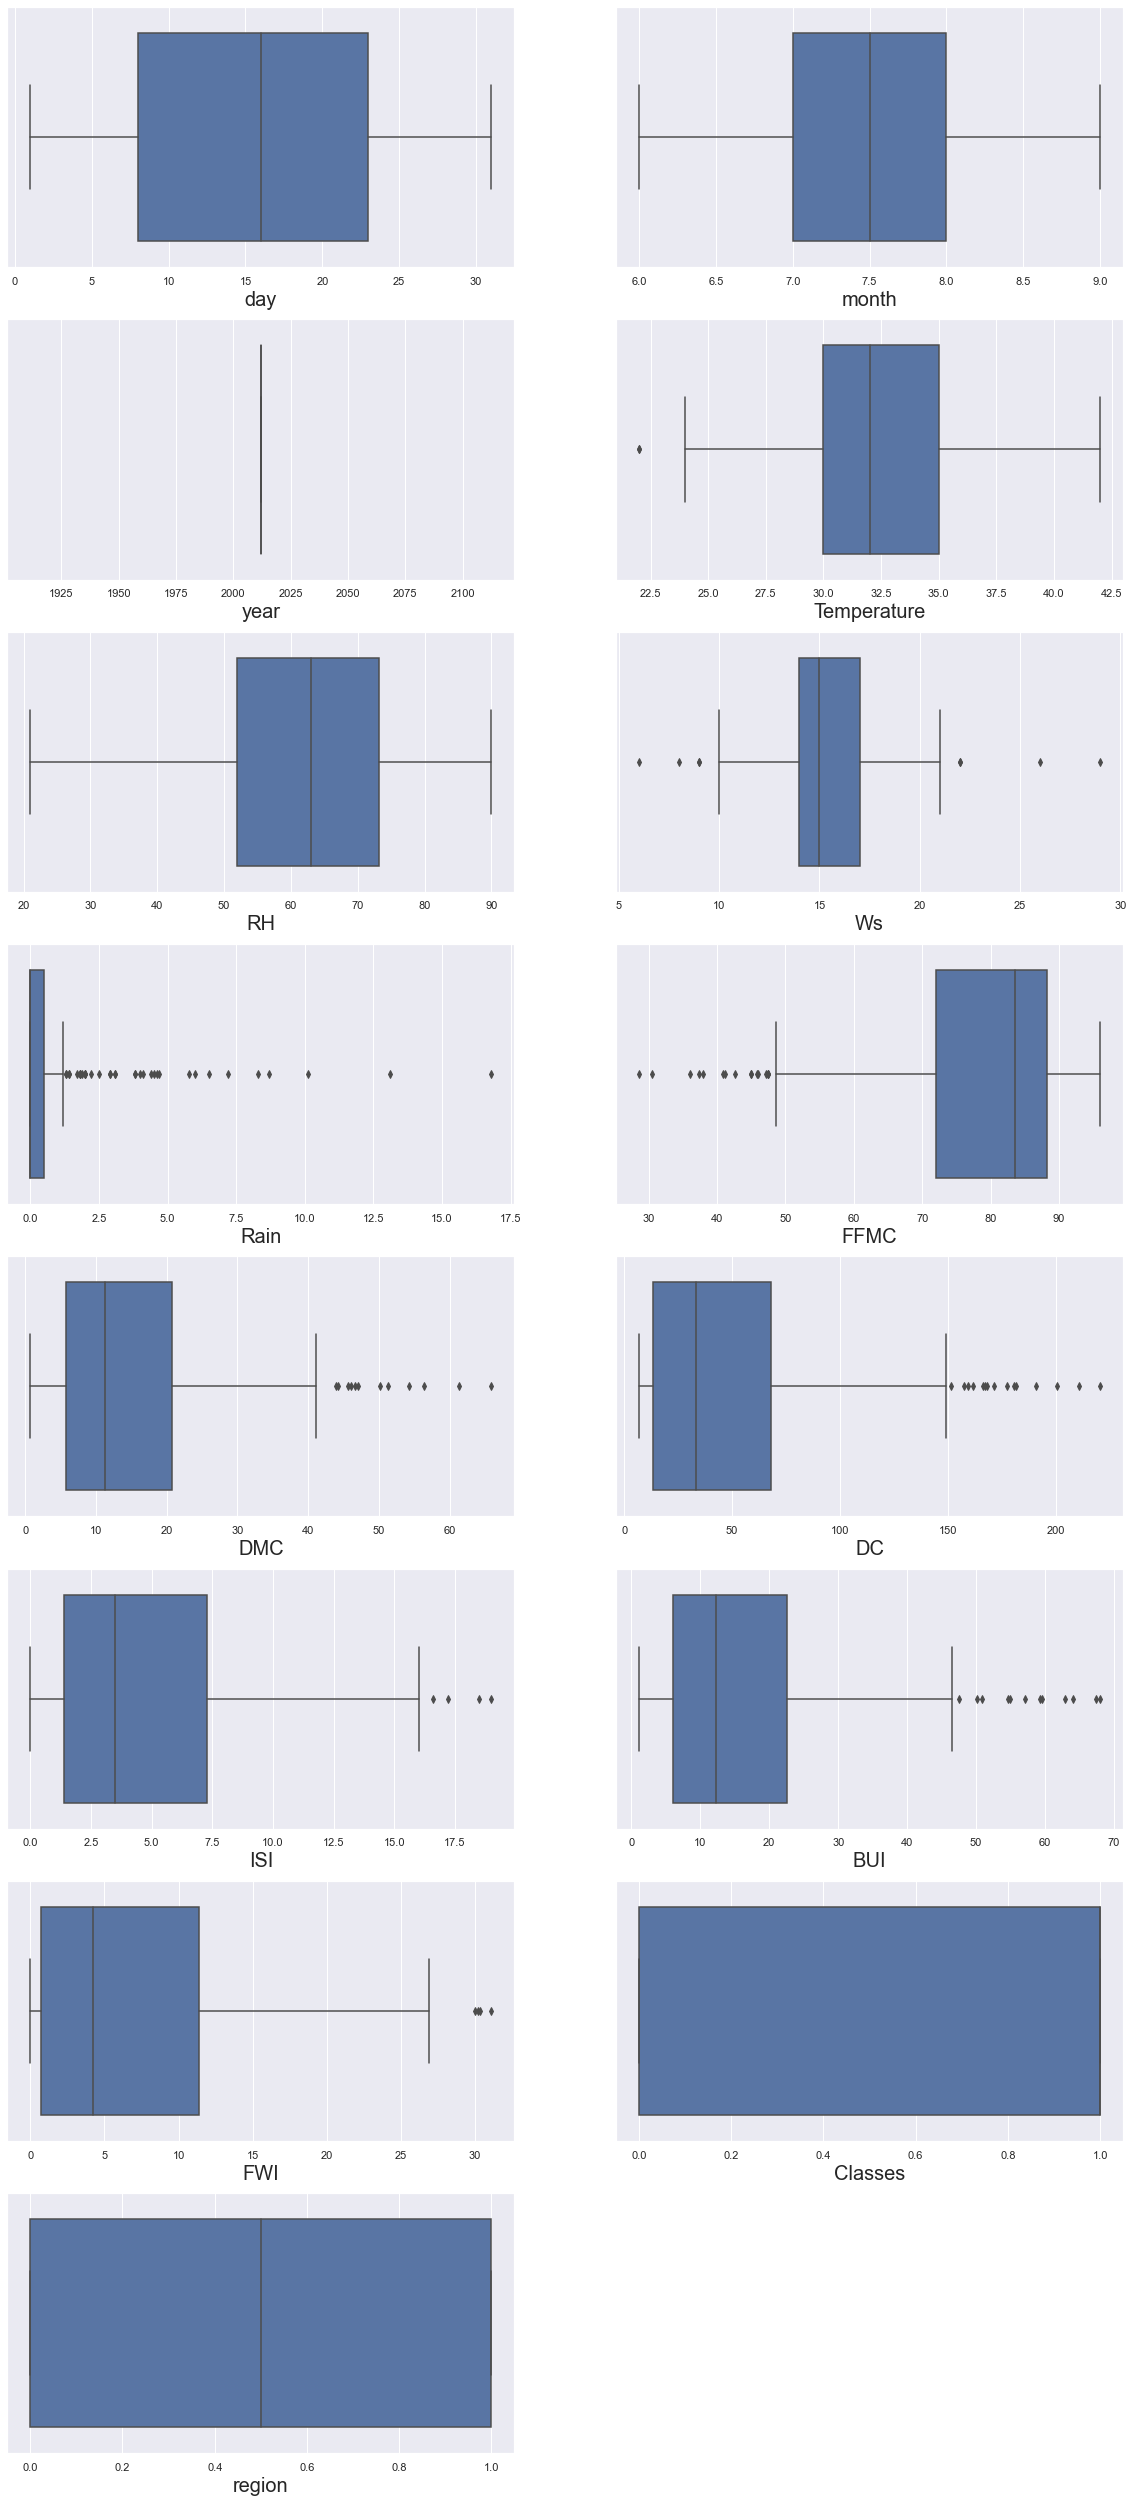

In [42]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Observation 
Ws, Rain, FFMC, DMC BUI has many outliers

## Dropping the outlires 

In [43]:
def outliers_imputation_mild(data,column):
    IQR=data[column].quantile(0.75)-data[column].quantile(0.25)
    lower_fence=data[column].quantile(0.25)-(IQR*1.5)
    upper_fence=data[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    data.loc[data[column]<=lower_fence,column]=lower_fence
    data.loc[data[column]>=upper_fence,column]=upper_fence 

In [44]:
columns=data.columns

In [45]:
for col in columns:
    outliers_imputation_mild(data,col)

IQR: 15.0
Lower Fence day: -14.5
Upper Fence day: 45.5
____________________________________________
IQR: 1.0
Lower Fence month: 5.5
Upper Fence month: 9.5
____________________________________________
IQR: 0.0
Lower Fence year: 2012.0
Upper Fence year: 2012.0
____________________________________________
IQR: 5.0
Lower Fence Temperature: 22.5
Upper Fence Temperature: 42.5
____________________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
____________________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
____________________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
____________________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
____________________________________________
IQR: 14.95
Lower Fence DMC: -16.624999999999996
Upper Fence DMC: 43.175
____________________________________________
IQR: 54.87500000000001
L

## Rechecking the outliers after dropping it 

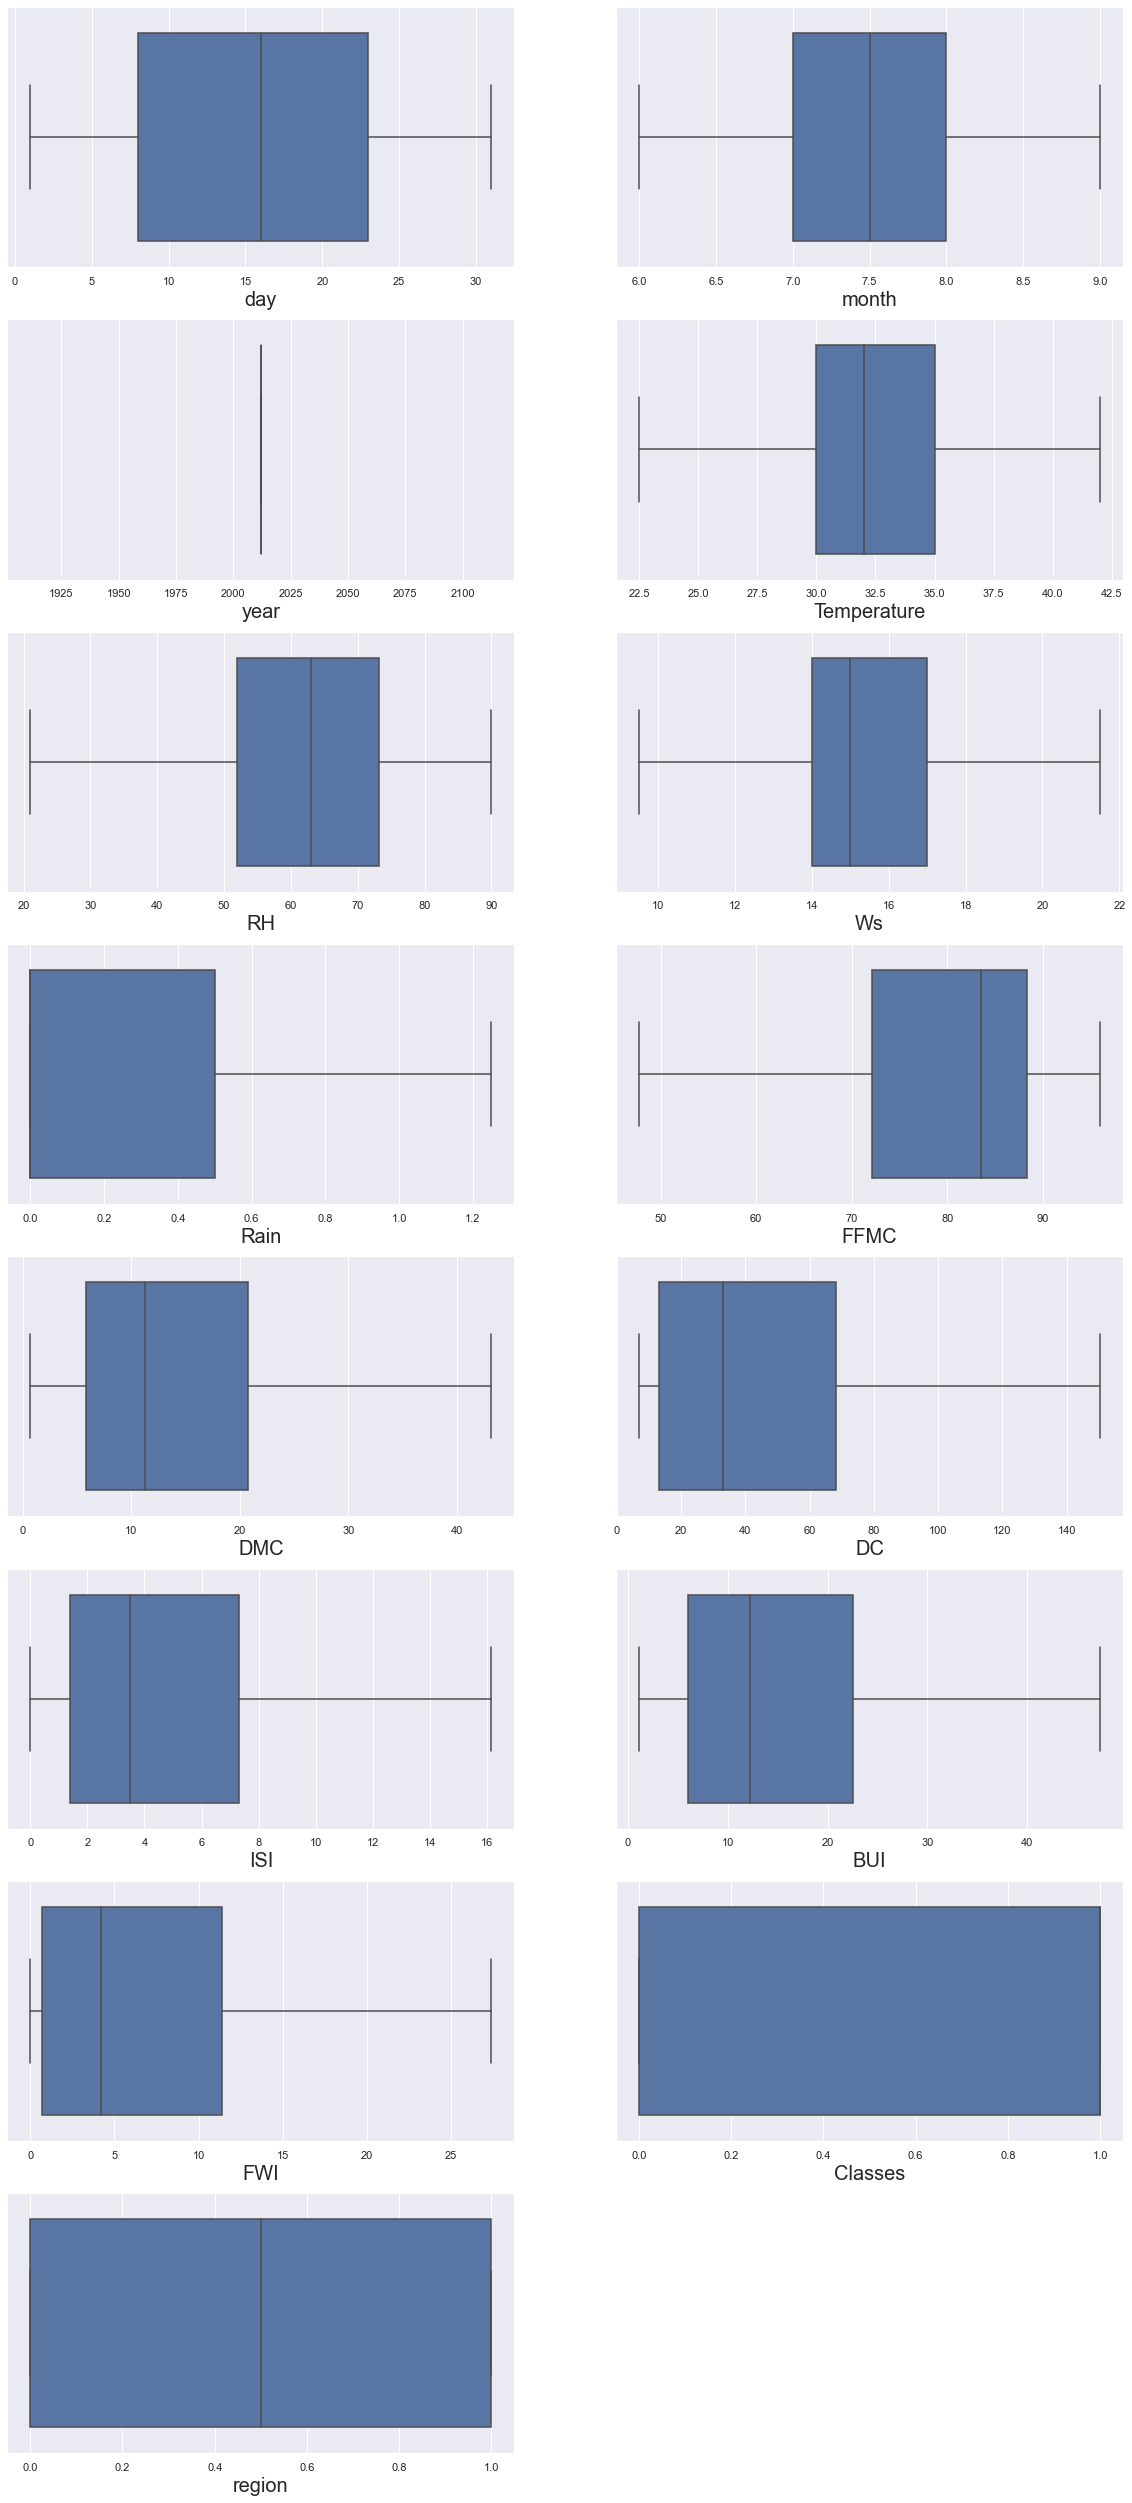

In [46]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Observation
Outlier is not present in any of the features

## Creating Independent and Dependent Features 

In [47]:
X = data.drop(columns = ['Classes'])
y = data['Classes']

## Independent Features 


In [50]:
X

day  month  year  Temperature    RH    Ws  Rain     FFMC   DMC    DC  \
0     1.0    6.0  2012         29.0  57.0  18.0  0.00  65.7000   3.4   7.6   
1     2.0    6.0  2012         29.0  61.0  13.0  1.25  64.4000   4.1   7.6   
2     3.0    6.0  2012         26.0  82.0  21.5  1.25  47.7375   2.5   7.1   
3     4.0    6.0  2012         25.0  89.0  13.0  1.25  47.7375   1.3   6.9   
4     5.0    6.0  2012         27.0  77.0  16.0  0.00  64.8000   3.0  14.2   
..    ...    ...   ...          ...   ...   ...   ...      ...   ...   ...   
239  26.0    9.0  2012         30.0  65.0  14.0  0.00  85.4000  16.0  44.5   
240  27.0    9.0  2012         28.0  87.0  15.0  1.25  47.7375   6.5   8.0   
241  28.0    9.0  2012         27.0  87.0  21.5  0.50  47.7375   3.5   7.9   
242  29.0    9.0  2012         24.0  54.0  18.0  0.10  79.7000   4.3  15.2   
243  30.0    9.0  2012         24.0  64.0  15.0  0.20  67.3000   3.8  16.5   

     ISI   BUI  FWI  region  
0    1.3   3.4  0.5     0.0  
1    1.0   3.9  0.4     0.0  
2    0.3   2.7  0.1     0.0  
3    0.0   1.7  0.0     0.0  
4    1.2   3.9  0.5     0.0  
..   ...   ...  ...     ...  
239  4.5  16.9  6.5     1.0  
240  0.1   6.2  0.0     1.0  
241  0.4   3.4  0.2     1.0  
242  1.7   5.1  0.7     1.0  
243  1.2   4.8  0.5     1.0  

[244 rows x 14 columns]

## Dependent Features 

In [49]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes, Length: 244, dtype: float64

## Visualizing the relationship between our independent and dependent Features

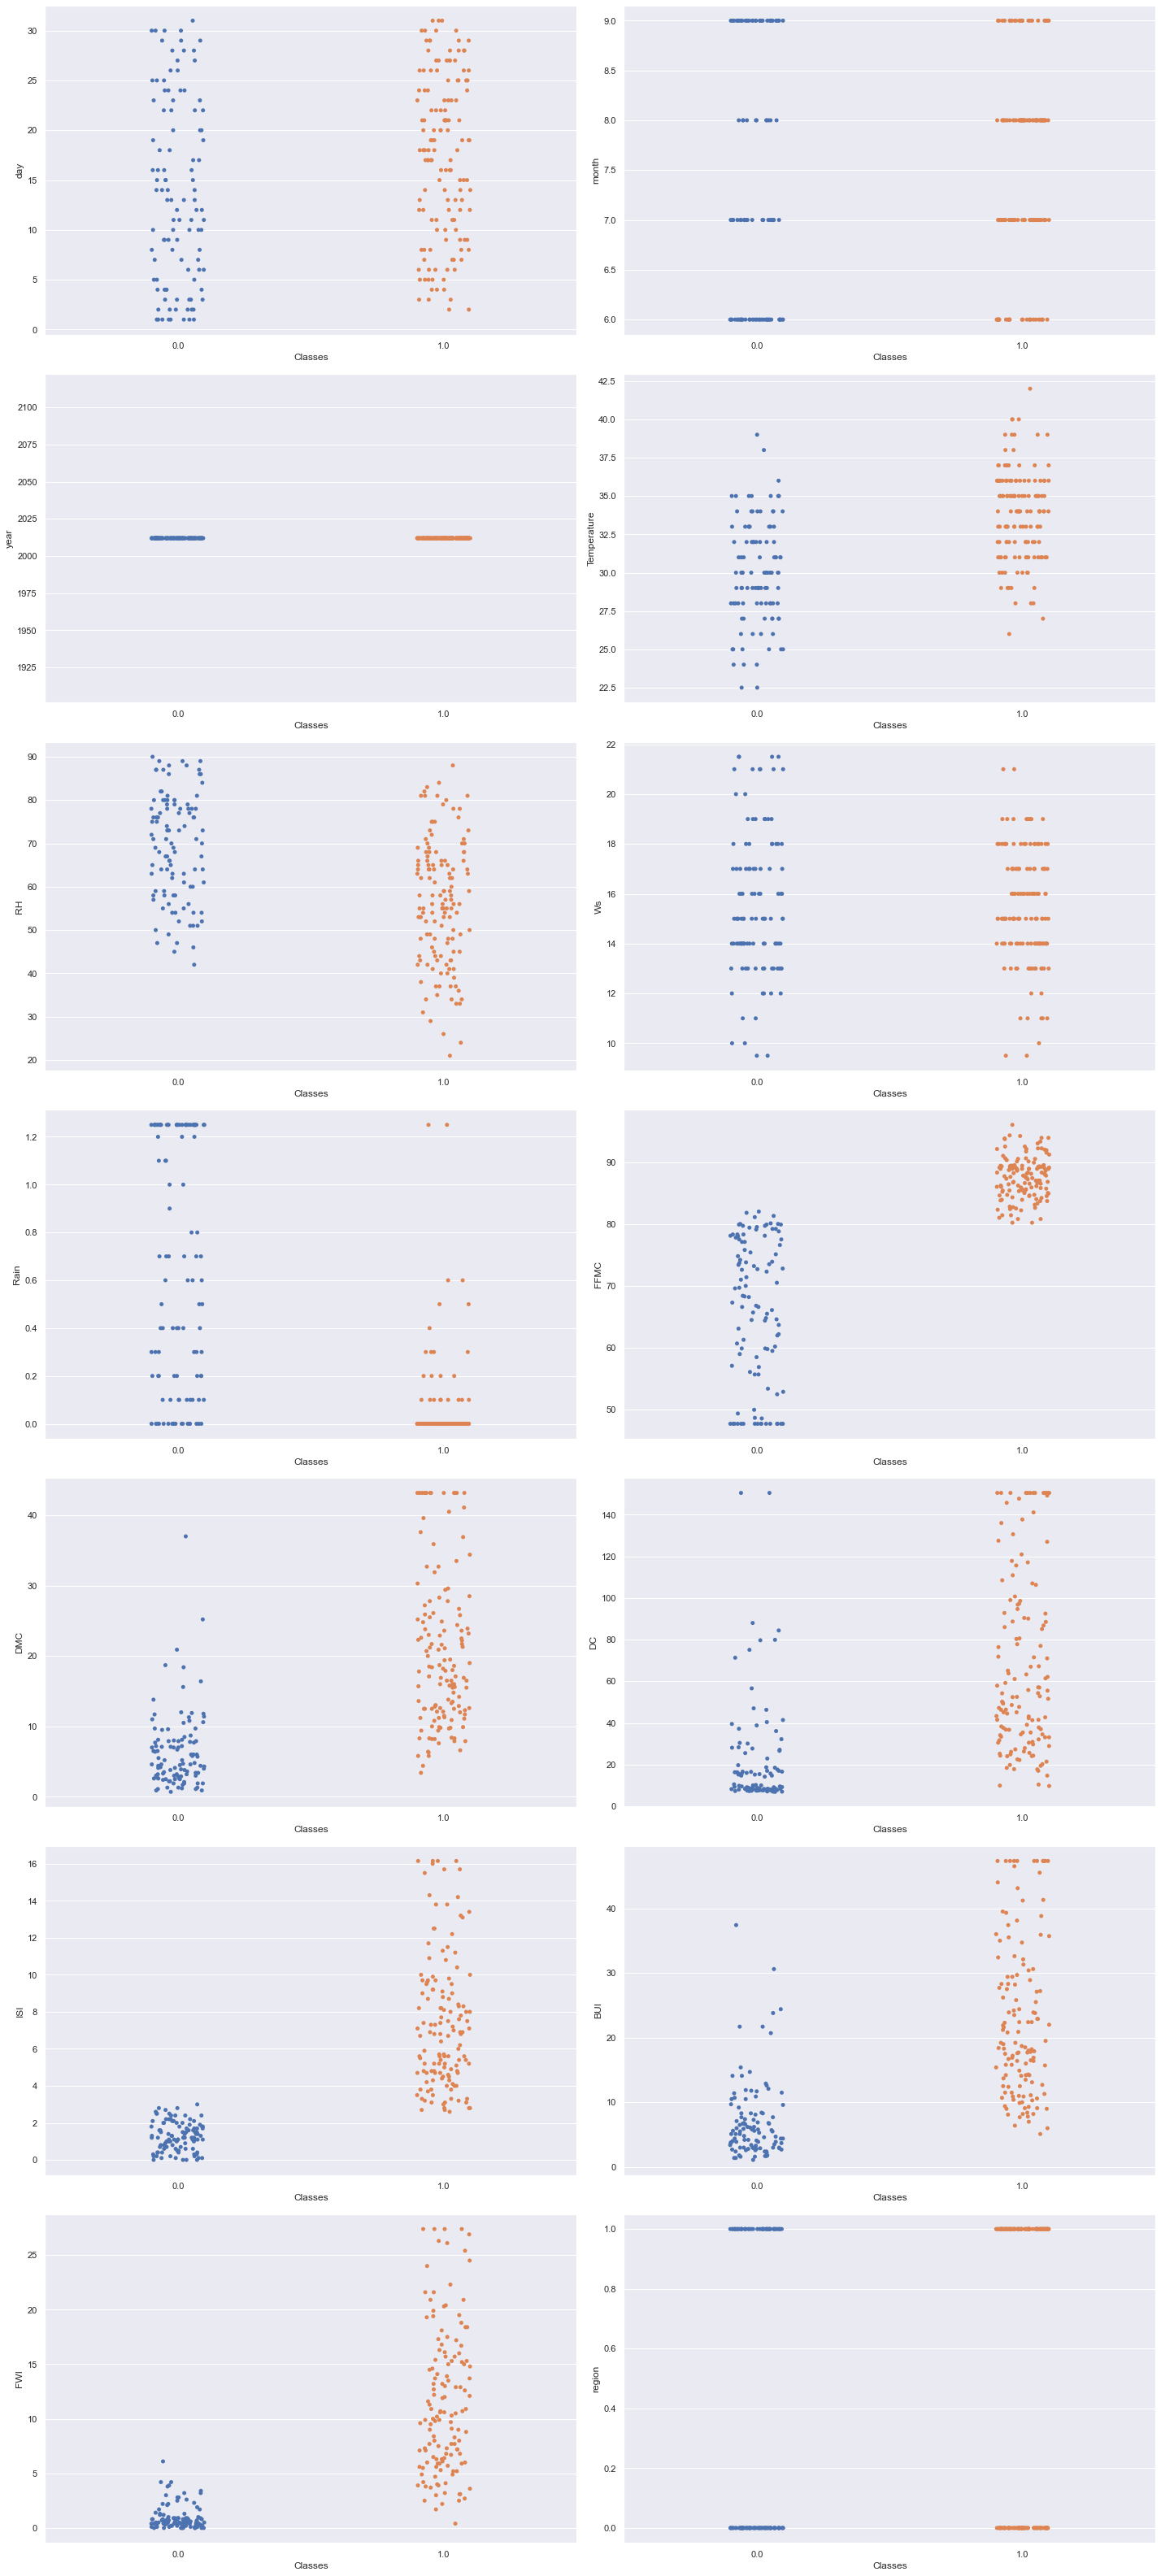

In [51]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

## Importing sklearn libraries for Machine Learning 

In [52]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## Train test split 

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Logistic Regression Model Training 

In [54]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [55]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [56]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## Standardizing or Feature Selection 

In [57]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [58]:
print(classifier_regressor.best_params_)  ## Best parameter

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [59]:
print(classifier_regressor.best_score_)  ## Best Score

0.9725225225225225


## Prediction

In [60]:
y_pred = classifier_regressor.predict(X_test)

In [61]:
y_pred

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

## Accuracy score 

In [62]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.9508196721311475


## Classification Report 

In [63]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        25
         1.0       0.95      0.97      0.96        36

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



## Performance Metrics

### Confusion Metrics

In [64]:
conf_mat=confusion_matrix(y_pred,y_test)

In [65]:
conf_mat

array([[23,  2],
       [ 1, 35]], dtype=int64)

In [66]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

## Breaking down the formula for Accuracy

In [67]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9508196721311475

## Precision 

In [68]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.92

## Recall 

In [69]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9583333333333334

## F1 Score 

In [70]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9387755102040817

## Area Under Curve 

In [71]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9521396396396398

## Roc 

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

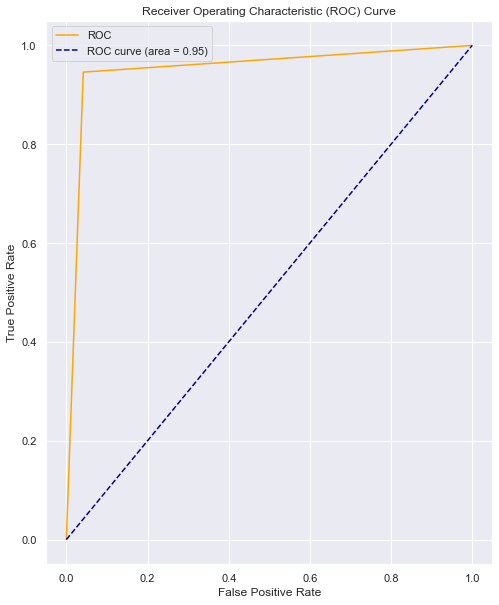

In [73]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### What is the significance of Roc curve and AUC?
In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.

## Creating Imbalance dataset from the original balanced dataset 

In [74]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

In [75]:
df.shape

(244, 15)

In [76]:
### Creating imbalance
### 1. splitting data in 90:10 percent ratio using train test split
X1 = pd.DataFrame(df, columns = ['day', 'month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])
y1=pd.DataFrame(df,columns = ['Classes'])

In [77]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [78]:
## Both will have same shape
X_train_imb.shape, y_train_imb.shape

((219, 14), (219, 1))

In [79]:
## Both will have same shape
X_test_imb.shape, y_test_imb.shape

((25, 14), (25, 1))

## Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance 


In [80]:
y_train_imb=y_train_imb.replace(0,1)
y_train_imb.head()

Classes
156        1
183        1
11         1
75         1
130        1

In [81]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()

Classes
48         0
216        0
101        0
38         0
86         0

In [82]:
X_train_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI  \
156    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3   
183    1      8  2012           38  52  14   0.0  78.3   4.4  10.5   2.0   
11    12      6  2012           26  81  19   0.0  84.0  13.8  61.4   4.8   
75    15      8  2012           36  55  13   0.3  82.4  15.6  92.5   3.7   
130    9      6  2012           27  59  18   0.1  78.1   8.5  14.7   2.4   

      BUI   FWI  region  
156  18.7  15.0       1  
183   4.4   0.8       1  
11   17.7   7.1       0  
75   22.0   6.3       0  
130   8.3   1.9       1

In [83]:
### Combining X_train_imb and y_train_imb
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI  \
156    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3   
183    1      8  2012           38  52  14   0.0  78.3   4.4  10.5   2.0   
11    12      6  2012           26  81  19   0.0  84.0  13.8  61.4   4.8   
75    15      8  2012           36  55  13   0.3  82.4  15.6  92.5   3.7   
130    9      6  2012           27  59  18   0.1  78.1   8.5  14.7   2.4   

      BUI   FWI  region  Classes  
156  18.7  15.0       1        1  
183   4.4   0.8       1        1  
11   17.7   7.1       0        1  
75   22.0   6.3       0        1  
130   8.3   1.9       1        1

In [84]:
### Combining X_test_imb and y_test_imb
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI  \
48    19      7  2012           35  59  17   0.0  88.1  12.0   52.8  7.7   
216    3      9  2012           28  75  16   0.0  82.2   4.4   24.3  3.3   
101   10      9  2012           33  73  12   1.8  59.9   2.2    8.9  0.7   
38     9      7  2012           32  68  14   1.4  66.6   7.7    9.2  1.1   
86    26      8  2012           31  78  18   0.0  85.8  45.6  190.6  4.7   

      BUI   FWI  region  Classes  
48   18.2  10.9       0        0  
216   6.0   2.5       1        0  
101   2.7   0.3       0        0  
38    7.4   0.6       0        0  
86   57.1  13.7       0        0

In [85]:
### Checking the shape of imbalanced Data
train_imb.shape, test_imb.shape

((219, 15), (25, 15))

In [86]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset 
df_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)
df_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
1    1      8  2012           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   
2   12      6  2012           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
3   15      8  2012           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
4    9      6  2012           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

    FWI  region  Classes  
0  15.0       1        1  
1   0.8       1        1  
2   7.1       0        1  
3   6.3       0        1  
4   1.9       1        1

In [87]:
df_imb.shape

(244, 15)

## Checking the imbalancing  

In [88]:
df_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

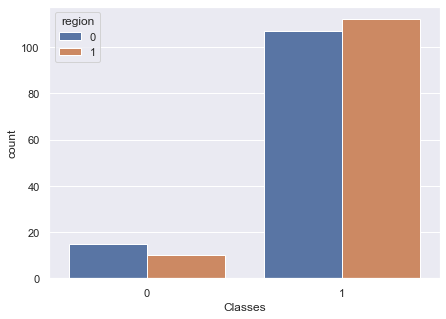

In [89]:
## 0 is 'Bejaia' and 1 is 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data=df_imb,x='Classes',hue='region')

## Logistic Regression on imbalanced Dataset 

In [90]:
df_imb.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
0    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
1    1      8  2012           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   
2   12      6  2012           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
3   15      8  2012           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
4    9      6  2012           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

    FWI  region  Classes  
0  15.0       1        1  
1   0.8       1        1  
2   7.1       0        1  
3   6.3       0        1  
4   1.9       1        1

## Separating Independent and Dependent feature 

In [91]:
X1 = df_imb.drop(columns = ['Classes'])
y1 = df_imb['Classes']

In [92]:
X1

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI  \
0      5      7  2012           34  45  18   0.0  90.5  18.7   46.4  11.3   
1      1      8  2012           38  52  14   0.0  78.3   4.4   10.5   2.0   
2     12      6  2012           26  81  19   0.0  84.0  13.8   61.4   4.8   
3     15      8  2012           36  55  13   0.3  82.4  15.6   92.5   3.7   
4      9      6  2012           27  59  18   0.1  78.1   8.5   14.7   2.4   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...    ...   ...   
239   26      8  2012           33  37  16   0.0  92.2  61.3  167.2  13.1   
240    1      6  2012           29  57  18   0.0  65.7   3.4    7.6   1.3   
241    2      9  2012           28  67  19   0.0  75.4   2.9   16.3   2.0   
242   11      8  2012           35  63  13   0.0  88.9  21.7   77.0   7.1   
243    9      8  2012           39  43  12   0.0  91.7  16.5   30.9   9.6   

      BUI   FWI  region  
0    18.7  15.0       1  
1     4.4   0.8       1  
2    17.7   7.1       0  
3    22.0   6.3       0  
4     8.3   1.9       1  
..    ...   ...     ...  
239  64.0  30.3       1  
240   3.4   0.5       0  
241   4.0   0.8       1  
242  25.5  12.1       0  
243  16.4  12.7       1  

[244 rows x 14 columns]

In [93]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int32

## Handling Imbalanced Dataset 

## Upsampling 

In [94]:
!pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [110]:
from imblearn.combine import SMOTETomek

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (C:\Users\Nishita Bajaj\anaconda3\lib\site-packages\sklearn\base.py)

In [113]:
smk=SMOTETomek()
smk

NameError: name 'SMOTETomek' is not defined

In [ ]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [ ]:
X_bal.head()

In [ ]:
y_bal.head()

In [ ]:
X_bal.shape,y_bal.shape

In [112]:
## Creating Balanced data from imbalanced data
data_bal=X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

NameError: name 'X_bal' is not defined

## EDA ON BALANCED DATASET

In [111]:
data_bal.info()

NameError: name 'data_bal' is not defined

## Statistical analysis on Balanced Dataset

In [ ]:
data_bal.describe()

In [ ]:
data_bal.corr()

In [ ]:
data_bal.cov()

In [ ]:
num_bal_col=[feature for feature in data_bal.columns if data_bal[feature].dtype != 'O']
num_bal_col

## Comparing the feature for Original and Balanced Dataset 

In [ ]:
for i in num_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=data,x=i,kde=True,bins=30)
    
    
    plt.subplot(122)
    sns.histplot(data=data_bal,x=i,kde=True,bins=30)

## Checking the Outliers for Original and Balanced Dataset 

In [ ]:
for i in num_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=data,x=i,color='r')
    
    
    plt.subplot(122)
    sns.boxplot(data=data_bal,x=i,color='r')

## Test train Split 

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_bal,y_bal,test_size=0.30,random_state=16)

In [ ]:
X_train1

In [ ]:
X_test1

In [ ]:
y_train1

In [ ]:
y_test1

## Logistic Regression Model 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_bal={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [ ]:
classifier_regressor_bal=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## Standarizing or Feature Scaling 

In [ ]:
classifier_regressor_bal.fit(X_train1,y_train1)

In [ ]:
print(classifier_regressor_bal.best_params_)

In [ ]:
print(classifier_regressor_bal.best_score_)

## Prediction 

In [ ]:
y_bal_pred = classifier_regressor_bal.predict(X_test1)

In [ ]:
y_bal_pred

## Acurracy 

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
bal_score=accuracy_score(y_bal_pred,y_test1)
print(bal_score)

## Classification Report 

In [ ]:
print(classification_report(y_bal_pred,y_test1))

## Performance Metrics 

## Confusion Metrics 

In [ ]:
conf_mat_bal=confusion_matrix(y_bal_pred,y_test1)

In [ ]:
conf_mat_bal

In [ ]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]

## Precision 

In [ ]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

## Recall 

In [ ]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

## F1 score 

In [ ]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

# Conclusion

## Performance of Logistic Model on Original Dataset

In [ ]:
print(classification_report(y_pred,y_test))

## Performance of Logistic Model on Balanced Dataset which are created from imbalanced dataset 

In [ ]:
print(classification_report(y_bal_pred,y_test1))

## Observation

It seems that model is good when we predict from original dataset

It seems that model is very bad when we try to predict from balanced(created from an imbalanced dataset )